In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses

In [19]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))


In [20]:
# Define sparsity constraint parameters
sparsity_target = 0.05  # Desired sparsity level
sparsity_weight = 0.1    # Weight for the sparsity penalty


In [21]:
# Custom loss function to include sparsity penalty
def sparsity_loss(sparsity_target, sparsity_weight):
    def loss(y_true, y_pred):
        reconstruction_loss = losses.mean_squared_error(y_true, y_pred)
        # Compute the sparsity loss using KL divergence
        p = tf.reduce_mean(y_pred, axis=0)
        sparsity_penalty = sparsity_weight * tf.reduce_sum(sparsity_target * tf.math.log(sparsity_target / (p + 1e-10)) +
                                                            (1 - sparsity_target) * tf.math.log((1 - sparsity_target) / (1 - p + 1e-10)))
        return reconstruction_loss + sparsity_penalty
    return loss


In [22]:

# Build the sparse autoencoder model
input_img = layers.Input(shape=(28 * 28,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(28 * 28, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=sparsity_loss(sparsity_target, sparsity_weight))


In [24]:
# Display some original and reconstructed images
import matplotlib.pyplot as plt


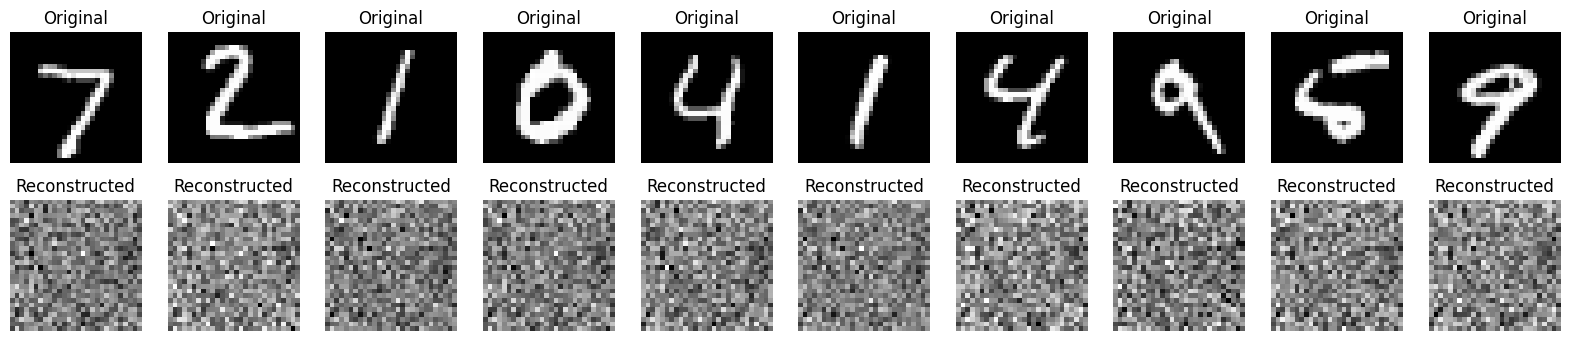

In [25]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()